# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Diestra Pradana Duta Ramadhan
- **Email:** duta2711@gmail.com
- **ID Dicoding:** dutaramadhan2711

## Menentukan Pertanyaan Bisnis

- Wilayah mana saja yang memiliki rata-rata konsentrasi polutan(PM2.5, PM10, SO2, NO2, CO, O3) tertinggi? 
- Bagaimana pola tren kualitas udara berdasarkan hari kerja dan akhir pekan di setiap wilayah?

## Import Semua Packages/Library yang Digunakan

In [751]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataset yang saya gunakan adalah dataset kualitas udara yang didalamnya terdapat 12 data dari 12 wilayah dalam rentang waktu 1 Maret 2013 - 28 Februari 2017. 

Saya melakukan listing terhadap kedua belas dataset, yang kemudian saya ubah menjadi dataframe untuk masing-masing dataset.

In [752]:
datasets = os.listdir('data')
df_list = []

for dataset in datasets:
    df_list.append(pd.read_csv(os.path.join('data', dataset)))

In [753]:
aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df = df_list

In [754]:
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [755]:
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [756]:
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [757]:
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [758]:
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [759]:
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [760]:
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [761]:
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [762]:
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [763]:
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [764]:
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [765]:
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [766]:
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight:**
- Dataset memiliki beberapa kolom, yaitu year, month, day, hour, PM2.5, PM10, SO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, dan Station

### Assessing Data

Dataframe dari masing-masing wilayah akan dinilai dari sisi kualitas dari seluruh data yang akan digunakan. Setiap dataframe akan diperiksa informasinya, diperiksa apakah ada bagian data yang kosong, dan diperiksa apakah ada data duplikat.

#### Aotizhongxin

Periksa informasi menggunakan fungsi `info()`

In [767]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [768]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [769]:
aotizhongxin_df.duplicated().sum()

0

#### Changping

Periksa informasi menggunakan fungsi `info()`

In [770]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [771]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [772]:
changping_df.duplicated().sum()

0

#### Dingling

Periksa informasi menggunakan fungsi `info()`

In [773]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [774]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [775]:
dingling_df.duplicated().sum()

0

#### Dongsi

Periksa informasi menggunakan fungsi `info()`

In [776]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [777]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [778]:
dongsi_df.duplicated().sum()

0

#### Guanyuan

Periksa informasi menggunakan fungsi `info()`

In [779]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [780]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [781]:
guanyuan_df.duplicated().sum()

0

#### Huairou

Periksa informasi menggunakan fungsi `info()`

In [782]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [783]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [784]:
huairou_df.duplicated().sum()

0

#### Nongzhanguan

Periksa informasi menggunakan fungsi `info()`

In [785]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [786]:
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [787]:
nongzhanguan_df.duplicated().sum()

0

#### Shunyi

Periksa informasi menggunakan fungsi `info()`

In [788]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [789]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [790]:
shunyi_df.duplicated().sum()

0

#### Tiantan

Periksa informasi menggunakan fungsi `info()`

In [791]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [792]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [793]:
tiantan_df.duplicated().sum()

0

#### Wanliu

Periksa informasi menggunakan fungsi `info()`

In [794]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [795]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [796]:
wanliu_df.duplicated().sum()

0

#### Wanshouxhingong

Periksa informasi menggunakan fungsi `info()`

In [797]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Periksa apakah ada bagian data yang kosong menggunakan fungsi `isna()`

In [798]:
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Periksa apakah ada data yang terduplikasi menggunakan fungsi `duplicated()`

In [799]:
wanshouxigong_df.duplicated().sum()

0

**Insight:**
- Kolom year, month, day, dan hour seharusnya menjadi satu kolom saja dalam bentuk date time
- Semua dataframe memiliki bagian data yang kosong
- Semua dataframe tidak memiliki data yang terduplikasi

### Cleaning Data

Dari pemeriksaan tidak ditemukan adanya duplikasi data di setiap dataframe. Setiap dataframe memiliki beberapa bagian kosong pada kolom PM2.5, PM10, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM. Pada bagian no, year, month, day, hour, dan station tidak ada data yang kosong.

Dari hasil analisis juga didapatkan bahwa kolom PM2.5, PM10, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, dan WSPM berupa data numeris sedangkan kolom wd berupa data kategorikal sehingga diperlukan pendekatan yang berbeda untuk pembersihan datanya.

Setiap data kosong dari kolom numeris akan saya lakukan interpolasi Saya menggunakan fungsi `interpolate()` untuk setiap DataFrame. Metode interpolasi yang saya gunakan adalah metode linear, yaitu mengisi nilai kosong secara linier berdasarkan nilai sebelum dan sesudahnya.

Sedangkan untuk data dari kolom `wd` yang kosong akan saya isi dengan menggunakan imputasi data. Data kosong akan diisi dengan modus atau nilai yang paling sering muncul dari kolom tersebut. 

#### Menambahkan Kolom Datetime

In [800]:
df_list = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]

for i in range(len(df_list)):
    df_list[i]["Datetime"] = pd.to_datetime(df_list[i][['year', 'month', 'day', 'hour']])

#### Mengisi data kosong dari kolom numerik (menggunakan interpolasi linear)

In [801]:
for i in range(len(df_list)):
    df_list[i] = df_list[i].interpolate(method='linear')

#### Mengisi data kosong untuk kolom `wd` (menggunakan imputasi data dengan modus atau nilai paling sering muncul)

In [802]:
for i in range(len(df_list)):
    modus = df_list[i]['wd'].mode()[0]
    df_list[i]['wd'].fillna(value=modus, inplace=True)
print(df_list[0].isna().sum())

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64


#### Menyimpan kembali hasil cleaning ke masing-masing dataframe

In [803]:
aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df = df_list

In [804]:
aotizhongxin_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [805]:
changping_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [806]:
dingling_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         2
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [807]:
dongsi_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [808]:
guanyuan_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [809]:
gucheng_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2         20
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
station      0
Datetime     0
dtype: int64

In [810]:
huairou_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [811]:
nongzhanguan_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [812]:
shunyi_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [813]:
tiantan_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [814]:
wanliu_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

In [815]:
wanshouxigong_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Datetime    0
dtype: int64

**Insight:**
- Semua data yang kosong telah terisi dengan suatu nilai
- Untuk data dari kolom numerik yang kosong diisi dengan menggunakan interpolasi linear yang mengisi nilai dari data tersebut berdasarkan nilai disekitarnya
- Untuk data dari kolom kategorikal diisi dengan menggunakan imputasi yang mengisi nilai dari data tersebut dengan nilai yang paling sering muncul pada kolom

## Exploratory Data Analysis (EDA)

### Explore ...

Untuk mempermudah menjawab semua pertanyaan saya menggabungkan semua dataframe menjadi satu yang saya berinama `all_df`.

In [816]:
all_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df], ignore_index=True)

In [817]:
all_df.to_csv('dashboard/all_df.csv', index =False)

In [818]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     420768 non-null  float64       
 6   PM10      420768 non-null  float64       
 7   SO2       420768 non-null  float64       
 8   NO2       420746 non-null  float64       
 9   CO        420768 non-null  float64       
 10  O3        420768 non-null  float64       
 11  TEMP      420768 non-null  float64       
 12  PRES      420768 non-null  float64       
 13  DEWP      420768 non-null  float64       
 14  RAIN      420768 non-null  float64       
 15  wd        420768 non-null  object        
 16  WSPM      420768 non-null  float64    

In [819]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420746.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.601416,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.171276,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,NaN


Untuk menjawab pertanyaan pertama saya mengelompokan data polutan (PM2.5, PM10, SO2, NO2, CO, O3) berdasarkan `station` menggunakan fungsi `groupby()`. Saya juga menghitung rata-rata bulanan untuk konsentrasi polutan dengan menggunakan fungsi `mean()`

In [820]:
pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

monthly_avg = all_df.groupby(['station'])[pollutant_columns].mean().reset_index()

In [821]:
monthly_avg

,station,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626
1,Changping,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253
2,Dingling,66.845557,84.113713,11.797849,27.305033,925.111838,70.530792
3,Dongsi,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357
4,Guanyuan,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142
5,Gucheng,84.074802,119.261567,15.705821,55.851320,1338.100060,58.000001
6,Huairou,69.501747,92.422670,12.446681,32.077275,1019.671871,60.872173
7,Nongzhanguan,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876
8,Shunyi,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810
9,Tiantan,82.033097,106.537076,14.510018,53.258828,1305.333262,56.148077


Untuk menjawab pertanyaan kedua saya menambahkan kolom baru yang mengidentifikasi apakah tanggal tersebut masuk hari kerja atau akhir pekan. Kemudian data akan dikelompokan berdasarkan hari kerja atau akhir pekan. Dari kedua kategori tersebut rata-rata konsentrasi akan dihitung.

In [822]:
all_df['dayofweek'] = all_df['Datetime'].dt.dayofweek

all_df['is_weekend'] = all_df['dayofweek'].apply(lambda x: 1 if x>=5 else 0)

print(all_df[['Datetime', 'dayofweek', 'is_weekend']])

                  Datetime  dayofweek  is_weekend
0      2013-03-01 00:00:00          4           0
1      2013-03-01 01:00:00          4           0
2      2013-03-01 02:00:00          4           0
3      2013-03-01 03:00:00          4           0
4      2013-03-01 04:00:00          4           0
...                    ...        ...         ...
420763 2017-02-28 19:00:00          1           0
420764 2017-02-28 20:00:00          1           0
420765 2017-02-28 21:00:00          1           0
420766 2017-02-28 22:00:00          1           0
420767 2017-02-28 23:00:00          1           0

[420768 rows x 3 columns]


In [823]:
weekday_vs_weekend = all_df.groupby(['station', 'is_weekend'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

In [824]:
weekday_vs_weekend

,station,is_weekend,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,0,80.751719,107.776121,17.285069,58.797288,1247.204330,55.009171
1,Aotizhongxin,1,87.004324,116.283168,17.893872,59.764826,1308.328920,56.125735
2,Changping,0,69.417198,92.519534,14.668118,43.949254,1131.712807,57.710667
3,Changping,1,74.902029,100.450321,15.629121,44.847173,1220.062900,58.638948
4,Dingling,0,65.587258,82.137711,11.662439,26.792021,904.213095,70.388318
5,Dingling,1,69.985283,89.044266,12.135725,28.585004,977.258702,70.886295
6,Dongsi,0,84.055523,107.709509,18.226144,53.909824,1320.902922,57.333584
7,Dongsi,1,91.356051,116.930265,19.204797,54.061005,1359.385672,58.615532
8,Guanyuan,0,81.196033,106.953258,17.283666,58.009691,1247.803798,54.600112
9,Guanyuan,1,87.143102,115.408502,18.421871,58.462695,1284.584811,55.358680


**Insight:**
- Dari analisis didapat bahwa wilayah yang memiliki rata-rata polutan tertinggi berbeda-beda bergantung pada jenis polutannya.
- Dari analisis juga didapat bahwa rata-rata polutan lebih tinggi pada akhir pekan mungkin akibat dari peningkatan aktivitas kendaraan pribadi karena masyarakat bepergian untuk rekreasi, belanja, atau kegiatan lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Wilayah mana saja yang memiliki rata-rata konsentrasi polutan(PM2.5, PM10, SO2, NO2, CO, O3) tertinggi? 

Untuk melakukan visualisai, saya membuat dataframe untuk masing-masing wilayah. Dataframe dibuat dengan mengelompokan data berdasar polutan. Dataframe tersebut kemudian akan divisualisasikan dengan menggunakan Bar Chart untuk menunjukan kota yang memiliki rata-rata polutan tertinggi.

In [825]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
dfs = [all_df.groupby(['station']).agg({pollutant: 'mean'}).sort_values(by=pollutant, ascending=False).reset_index() for pollutant in pollutants]

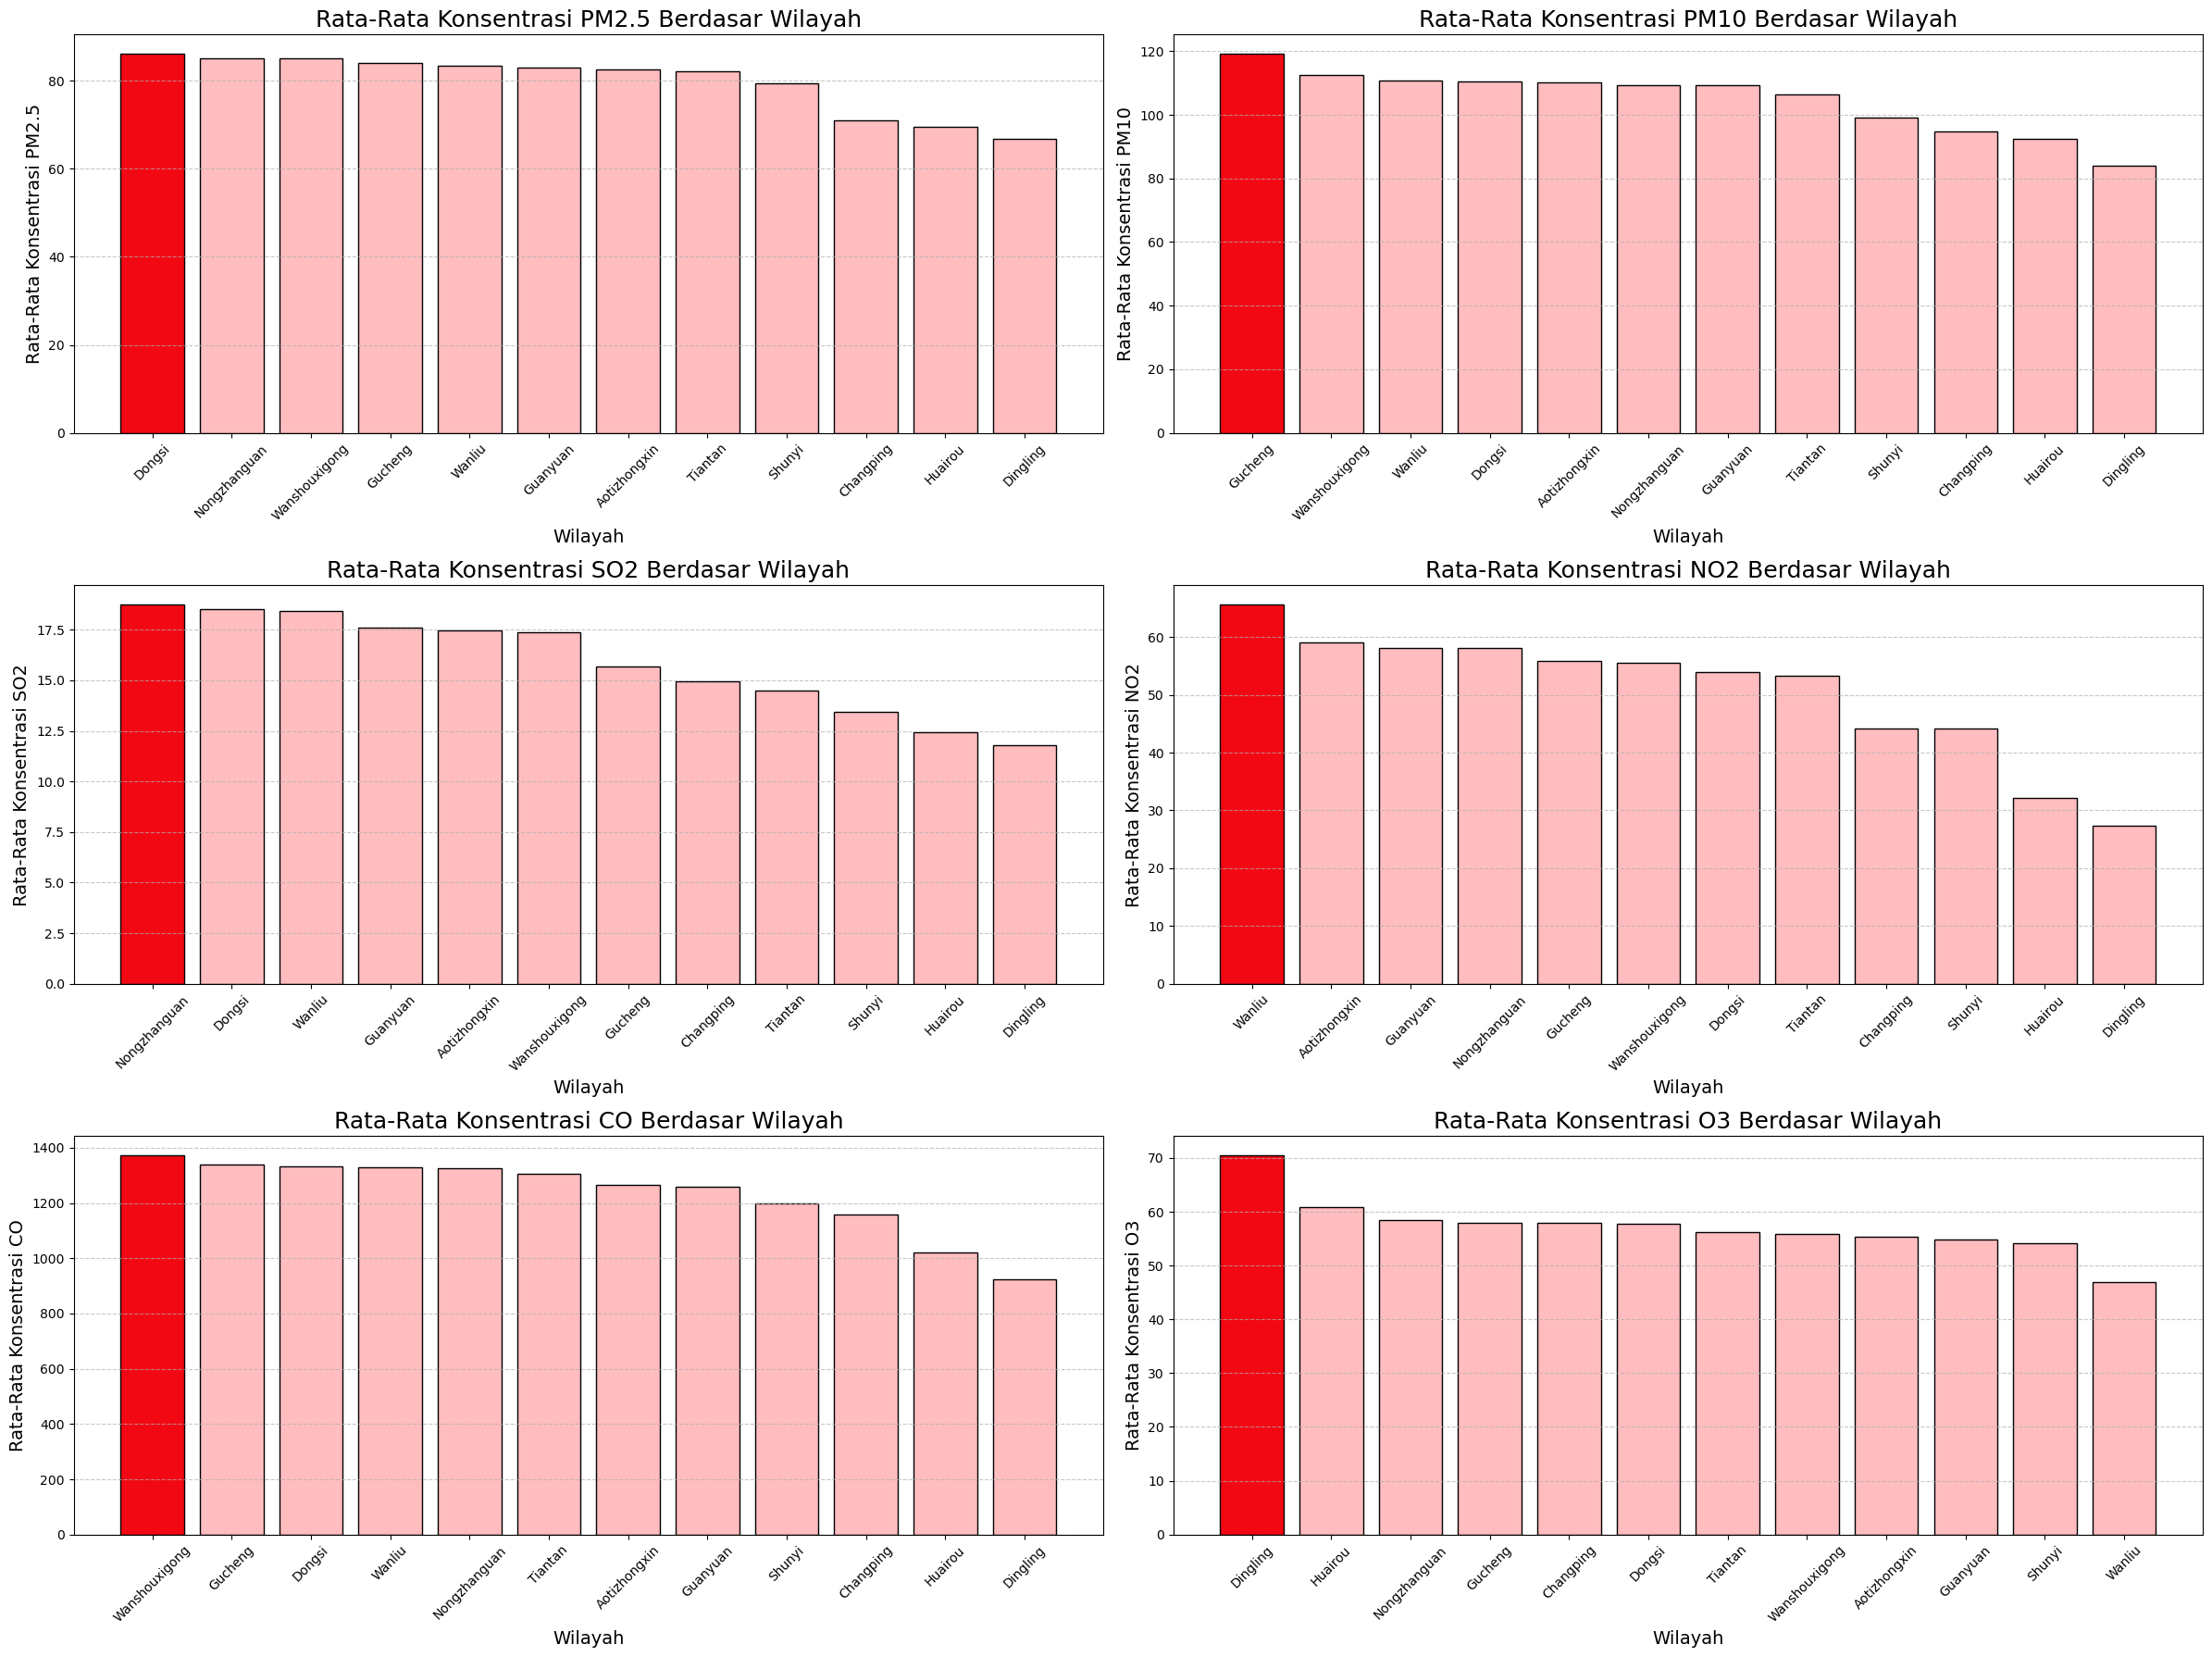

In [826]:
fig, axes = plt.subplots(3, 2, figsize=(24, 18))
high_color = "#F20813" 
low_color = "#FFBDC0"

for i, data in enumerate(dfs):
    ax = axes[i // 2, i % 2]
    max_value = data[data.columns[1]].max()
    colors = [high_color if value == max_value else low_color for value in data[data.columns[1]]]

    ax.bar(data['station'], data[data.columns[1]], color=colors, edgecolor='black')
    ax.set_title(f'Rata-Rata Konsentrasi {data.columns[1]} Berdasar Wilayah', fontsize=18)
    ax.set_xlabel('Wilayah', fontsize=14)
    ax.set_ylabel(f'Rata-Rata Konsentrasi {data.columns[1]}', fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana kualitas udara berdasarkan hari kerja dan akhir pekan di setiap wilayah?

Untuk memvisualisasikan kualitas udara berdasarkan hari kerja dan akhir pekan saya menggunakan Clustered Bar Chart yang akan menampilkan data dari setiap wilayah dan polutan. 

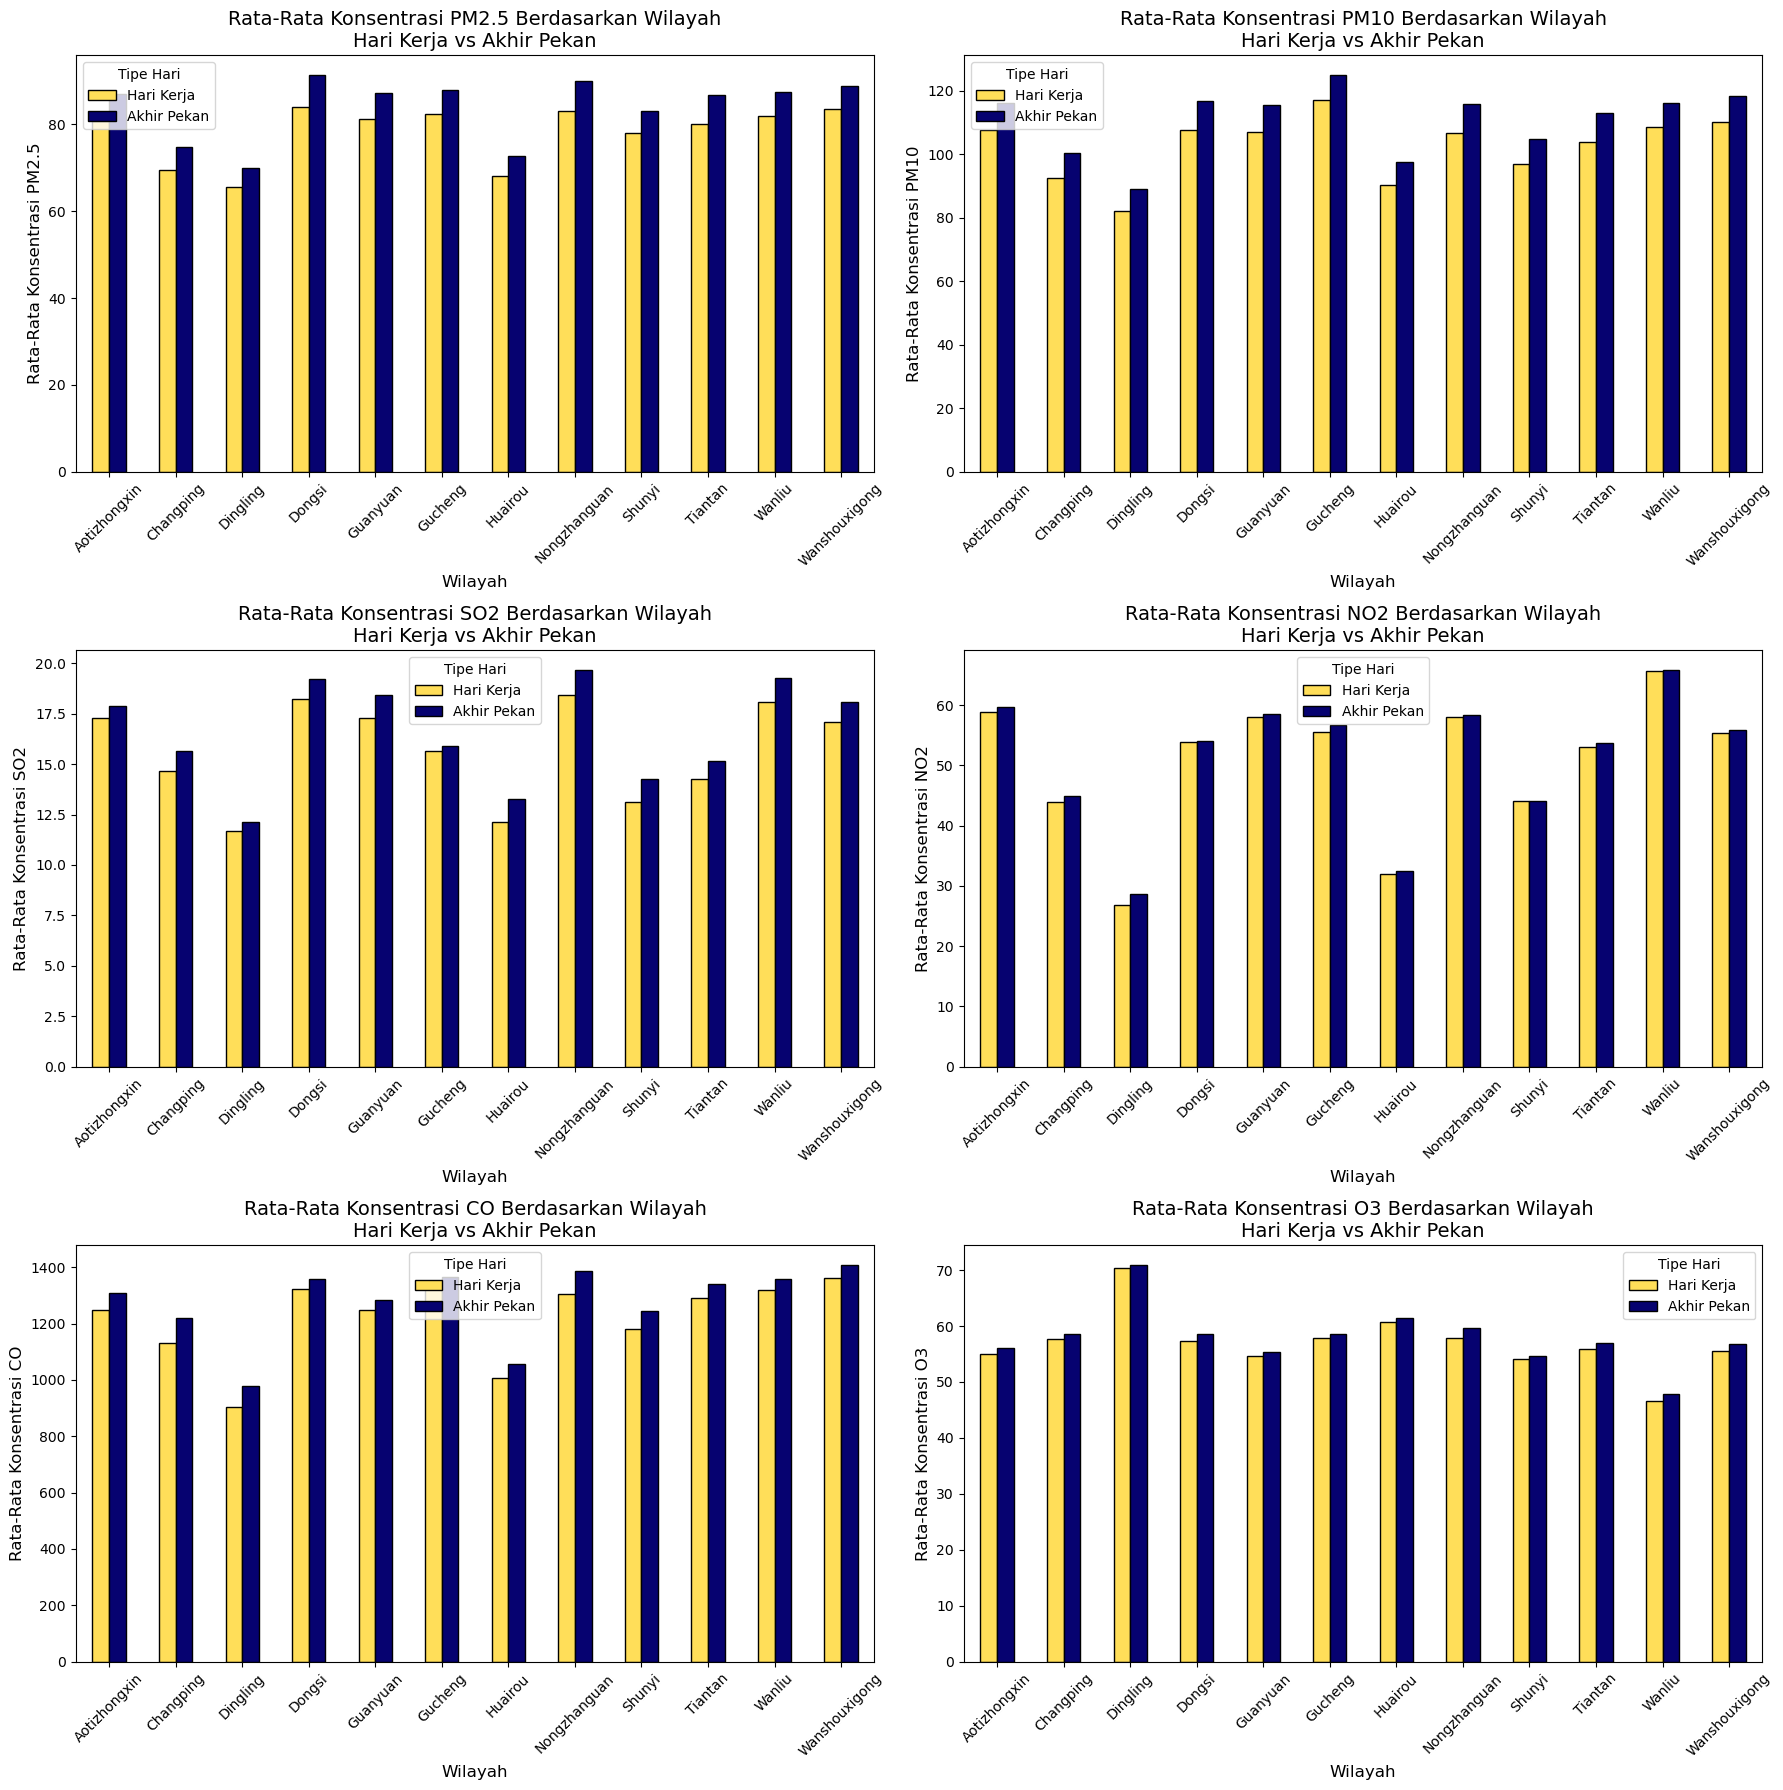

In [827]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    grouped_data = weekday_vs_weekend.pivot(index='station', columns='is_weekend', values=pollutant)
    grouped_data.plot(kind='bar', ax=axes[i], edgecolor='black', color=['#FFDE59', '#060270'], legend=True)

    axes[i].set_xlabel('Wilayah', fontsize=12)
    axes[i].set_ylabel(f'Rata-Rata Konsentrasi {pollutant}', fontsize=12)
    axes[i].set_title(f'Rata-Rata Konsentrasi {pollutant} Berdasarkan Wilayah\nHari Kerja vs Akhir Pekan', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45) 
    axes[i].legend(['Hari Kerja', 'Akhir Pekan'], title='Tipe Hari')

plt.tight_layout()
plt.show() 

**Insight:**
- Rata-rata konsentrasi tertinggi untuk setiap polutan tertinggi dipegang oleh wilayah yang berbeda-beda. Namun, Nazhanguan selalu berada di lima besar kota dengan konsentrasi polutan yang tertinggi. Hal tersebut menunjukan bahwa daerah tersebut miliki masalah terkait kualitas udaranya.
- Rata-rata konsentrasi setiap polutan di semua wilayah pada saat akhir pekan selalu lebih tinggi dari hari kerja.

## Conclusion

- Conclution pertanyaan 1: Rata-rata konsentrasi tertinggi untuk setiap polutan dipengang oleh wilayah yang berbeda-beda. Untuk rata-rata konsentrasi PM2.5 tertinggi adalah Dongsi, PM10 tertinggi adalah Gucheng, SO2 tertinggi adalah Nongzhanguan, NO2 tertinggi adalah Wanliu, CO tertinggi adalah Wanshouxigong, dan O3 tertinggi adalah Dingling. Namun, terdapat satu wilayah yang selalu masuk dalam lima besar konsentrasi polutan tertinggi, yaitu Nongzhanguan. Hal tersebut mengindikasikan bahwa kemungkina wilayah Nangzhanguan memiliki masalah terkait kualitas udaranya sehingga memerlukan perhatian lebih dari pihak yang berwenang.
- Conclution pertanyaan 2: Rata-rata konsentrasi setiap polutan selalu lebih tinggi di akhir pekan dibandingkan dengan hari kerja di setiap wilayah. Hal tersebut wajar karena mungkin disebabkan oleh meningkatnya aktivitas manusia, seperti rekreasi dan transportasi, yang cenderung lebih intensif pada akhir pekan. Aktivitas-aktivitas ini berpotensi meningkatkan emisi polutan ke udara, yang berdampak pada kualitas udara. Namun, pemantauan dan evaluasi tetap perlu dilakukan, terutama apabila terdapat industri yang secara ilegal tetap beroperasi di akhir pekan, yang dapat meningkatkan tingkat polutan tersebut.